READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE VACUUM VESSEL FIRST WALL...Done!
     -> APPROXIMATE PLASMA/VACUUM INTERFACE...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> INITIALISE UNKNOWN VECTORS AND COMPUTE INITIAL GUESS...
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
     Done!
Done!


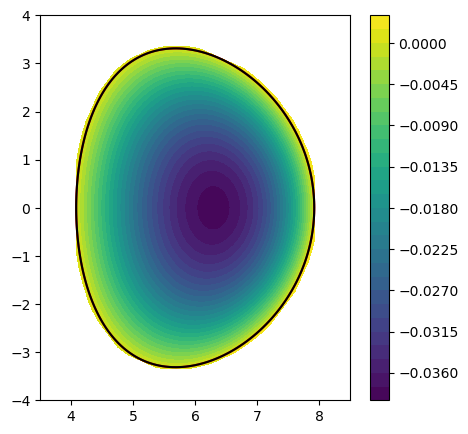

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [6.12700672e+00 1.91359341e-03]  (ELEMENT  19272 ) WITH VALUE PSI_0 =  [-0.03722499]


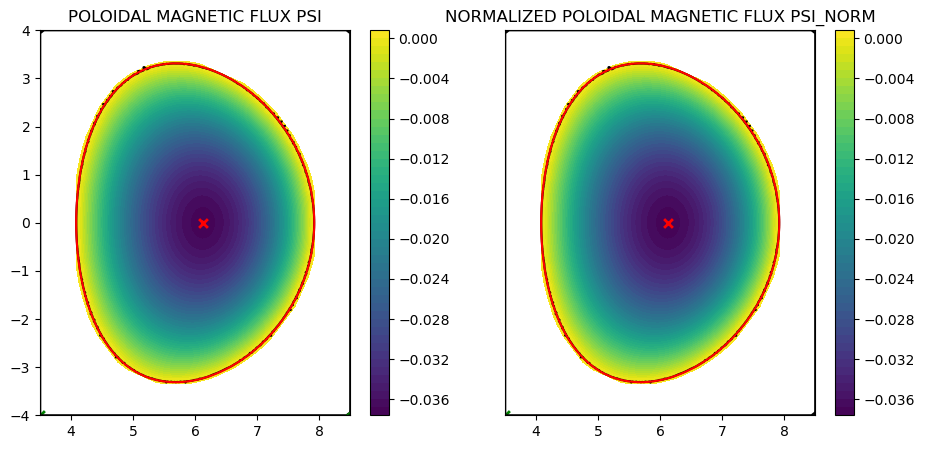

Internal iteration =  1 , PSI_NORM residu =  1.7786680384373514
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [6.12700672e+00 1.91359341e-03]  (ELEMENT  19272 ) WITH VALUE PSI_0 =  [-0.03722499]


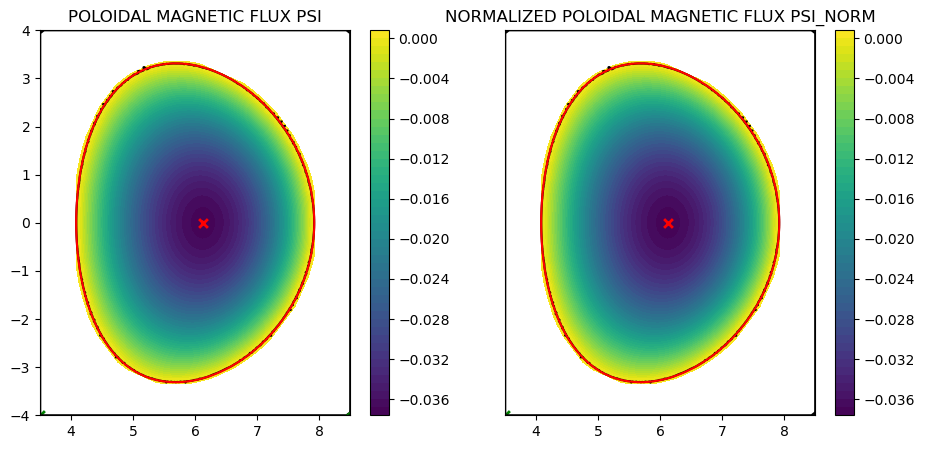

Internal iteration =  2 , PSI_NORM residu =  0.0
 
Total plasma current computed =  98484270.7845344
Total plasma current normalization factor =  -0.15230858573159628
Normalised total plasma current =  -15000000.0
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.0
 
SOLUTION CONVERGED


In [5]:
import sys
sys.path.append('/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/')

from src.GradShafranovCutFEM import *

### LOCATION OF FOLDERS
folder_MESHES = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/MESHES/'   # MESHES
folder_CASES = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/CASES/'     # CASES

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TS-CUTFEM-TRI03-COARSE'
#MESH = 'TS-CUTFEM-TRI03-MEDIUM'
#MESH = 'TS-CUTFEM-TRI03-FINE'
#MESH = 'TS-CUTFEM-TRI03-SUPERFINE'
#MESH = 'TS-CUTFEM-TRI03-MEGAFINE'
#MESH = 'TS-CUTFEM-TRI03-ULTRAFINE'
MESH = 'TS-CUTFEM-TRI03-ULTRAFINE-REDUCED'
###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-CUTFEM-TRI06-COARSE'
#MESH = 'TS-CUTFEM-TRI06-MEDIUM'
#MESH = 'TS-CUTFEM-TRI06-FINE'
#MESH = 'TS-CUTFEM-TRI06-SUPERFINE'
#MESH = 'TS-CUTFEM-TRI06-MEGAFINE'
#MESH = 'TS-CUTFEM-TRI06-ULTRAFINE'
###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-CUTFEM-TRI10-COARSE'
#MESH = 'TS-CUTFEM-TRI10-MEDIUM'
#MESH = 'TS-CUTFEM-TRI10-FINE'
#MESH = 'TS-CUTFEM-TRI10-SUPERFINE'
#MESH = 'TS-CUTFEM-TRI10-MEGAFINE'

###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'TS-CUTFEM-QUA04-COARSE'
#MESH = 'TS-CUTFEM-QUA04-MEDIUM'
#MESH = 'TS-CUTFEM-QUA04-FINE'
#MESH = 'TS-CUTFEM-QUA04-FINEbis'
#MESH = 'TS-CUTFEM-QUA04-SUPERFINE'
###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'TS-CUTFEM-QUA09-COARSE'
#MESH = 'TS-CUTFEM-QUA09-MEDIUM'
#MESH = 'TS-CUTFEM-QUA09-FINE'

# ... WITH MESH ELEMENTS:
ElementType = 1     # Element type -> 1: TRIANGLE  ; 2: QUADRILATERAL
ElementOrder = 1    # Element order -> 1: LINEAR  ; 2: QUADRATIC ; 3: CUBIC ...

### SELECT SOLUTION CASE FILE:
CASE = 'TS-FIXED-1W-LINEAR'         # FIXED PLASMA BOUNDARY WITH TOKAMAK FIRST WALL PLASMA REGION SHAPE AND LINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FIXED-1W-NONLINEAR'      # FIXED PLASMA BOUNDARY WITH TOKAMAK FIRST WALL PLASMA REGION SHAPE AND NONLINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FIXED-1W-ZHENG' 
#CASE = 'TS-FIXED-1W-PROFILES'
#CASE = 'TS-FIXED-F4E-LINEAR'         # FIXED PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND LINEAR PLASMA CURRENT
#CASE = 'TS-FIXED-F4E-PROFILES'      # FIXED PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND PLASMA CURRENT MODEL BASED ON PROFILES FOR PRESSURE AND TOROIDAL FIELD

##############################################################

# DECLARE OBJECT PROBLEM 
Problem = GradShafranovCutFEM(folder_MESHES+MESH,folder_CASES+CASE,ElementType,ElementOrder)

Problem.EQUILI()


0.13078349389621446


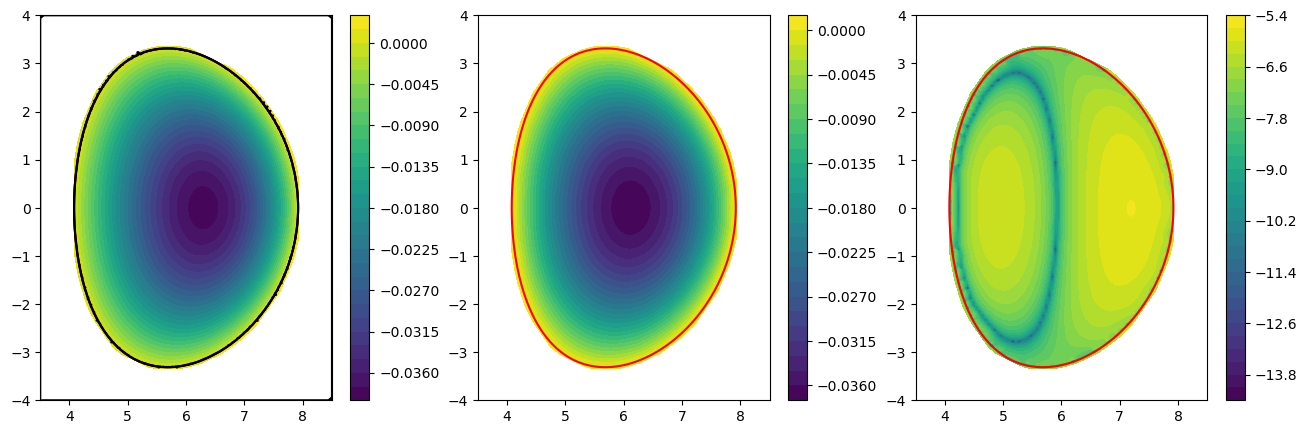

In [6]:
Problem.PlotError()

In [3]:
# TOKAMAK GEOMETRY:
R0 = 6.0
epsilon = 0.32
kappa = 1.7
delta = 0.33

# COMPUTE ZHENG ANALYTICAL SOLUTION COEFFICIENTS
Ri = R0*(1-epsilon)  # PLASMA SHAPE EQUATORIAL INNERMOST POINT R COORDINATE
Ro = R0*(1+epsilon)  # PLASMA SHAPE EQUATORIAL OUTERMOST POINT R COORDINATE
a = (Ro-Ri)/2                  # PLASMA MINOR RADIUS
Rt = R0 - delta*a    # PLASMA SHAPE HIGHEST POINT R COORDINATE
Zt = kappa*a              # PLASMA SHAPE HIGHEST POINT Z COORDINATE

coeffsZHENG = np.zeros([6])

# SET THE COEFFICIENT A1, and A2 TO 0 FOR SIMPLICITY
coeffsZHENG[5] = 0
coeffsZHENG[4] = -0.1

# FOR COEFFICIENTS C1, C2, C3 AND C4, WE SOLVE A LINEAR SYSTEM OF EQUATIONS BASED ON THE PLASMA SHAPE GEOMETRY
A = np.array([[1,Ri**2,Ri**4,np.log(Ri)*Ri**2],
                [1,Ro**2,Ro**4,np.log(Ro)*Ro**2],
                [1,Rt**2,(Rt**2-4*Zt**2)*Rt**2,np.log(Rt)*Rt**2-Zt**2],
                [0,2,4*(Rt**2-2*Zt**2),2*np.log(Rt)+1]])

b = np.array([[-(coeffsZHENG[4]*Ri**4)/8],
                [-(coeffsZHENG[4]*Ro**4)/8],
                [-(coeffsZHENG[4]*Rt**4)/8+(coeffsZHENG[5]*Zt**2)/2],
                [-(coeffsZHENG[4]*Rt**2)/2]])

coeffs = np.linalg.solve(A,b)
coeffsZHENG[:4] = coeffs.T[0].tolist()

# ANALYTICAL SOLUTION
def PSIanalytical(X,coeffsZHENG):
    PSIexact = coeffsZHENG[0]+coeffsZHENG[1]*X[0]**2+coeffsZHENG[2]*(X[0]**4-4*X[0]**2*X[1]**2)+coeffsZHENG[3]*(np.log(X[0])
                        *X[0]**2-X[1]**2)+(coeffsZHENG[4]*X[0]**4)/8 - (coeffsZHENG[5]*X[1]**2)/2
    return PSIexact

def Jphi(X,PSI,coeffsZHENG):
    mu0 = 12.566370E-7 
    Jphi = (coeffsZHENG[4]*X[0]**2 - coeffsZHENG[5])/ (X[0]*mu0)
    return Jphi

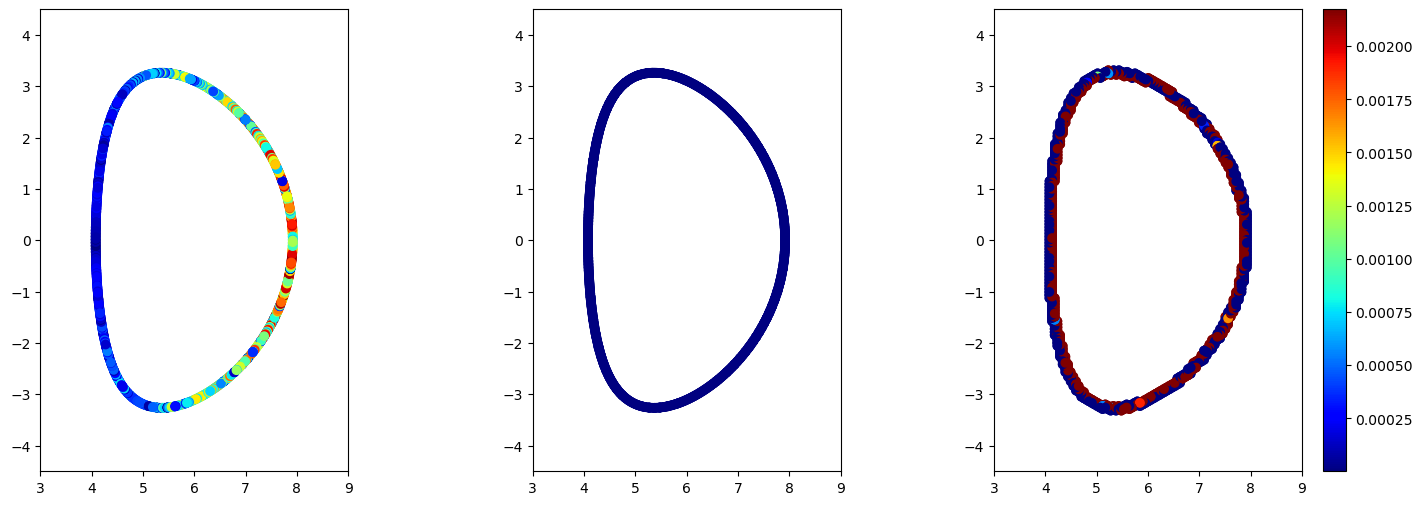

In [4]:
Problem.PlotPlasmaBoundaryConstraints()